# Is There a Racial Bias in the NYPD?

**Anthony Dang**

## Summary of Findings

### Introduction
***Question: Are white officer vs. non-white complainant cases more likely to go against the complainant?***

The dataset we will be using is a database of 12,000 civilian complaints against the New York City police. In the dataset, important information is given to help investigate our question. For example, we will be mainly using the ethnicities of both the complainant and officer, and the dispostion of the alleged conduct from the dataset to answer our question. Using the mentioned parts of the dataset is useful for answering the question because it allows us to see the connection between ethnicity and the result of a case. We can use tests, such as permutation tests, to see if white officers are winning more cases due to chance or conclude that there is another factor causing white officers to win more cases. 

### Cleaning and EDA


The data cleaning process I took first involved dropping unneccesary columns. For example, I dropped the rank abbreviaton columns because they just repeated other data in a harder to read format (the abbreviations are harder to understand as I wasn't familiar with police vernacular). This helped the data generating process because it made the data easier to work with by lessening the amount of data I needed to rummage through. Next, I replaced the missing ethnicity data with NaN values. These included blank data fields, 'Unknown' values, and 'Refused' values. This is important because working with NaN values will help make analyzing the data easier and help canonicalize the dataset. 

The columns of the dataset involving the case's start and end time were in an inconvenient format. The dates were seperated into individual columns so I combined them into one and converted it into a pd.TimeStamp to allow for easier analysis of time later. 

There are other columns with missing data (e.g. shield number, gender, etc.) but I didn't canonicalize them with NaN values because they are not useful for answering our question.

For the univariate analysis of the data, I chose to analyze the board disposition, complainant's ethnicity, and officer's ethnicity. 

#### Univariate Analysis
The univariate analysis of the board disposition involved replacing all the substantiated values (e.g. 'Substantiated (Charges)','Substantiated (Formalized Training)', etc.) into one singular 'Substantiated' value. Doing this allows for easier comparison and understanding of the result of the case. Also, the data with the label 'Unsubstantiated' was dropped because this label is not in favor of either the officer or complainant. Even though this drops values from our dataset, I believe having a neutral label doesn't benefit answering our question and leads to ambiguity. 

The univariate analysis of the complainant's ethnicity demonstrates Black and Hispanic numbers dominating the demographics.

The univariate analysis of the officer's ethnicity showcases White as the dominating demographic.

All univariate analyses are graphed in the Code section.
#### Bivariate Analysis
The bivariate analysis includes a pivot table/bar graph with the proportion of exonerated and substantiated cases for each complainant's ethnicity, pivot table/bar with the proportion of exonerated and substantiated cases for each officer's ethnicity, and the distribution of the case time of white and non-white complainants. These graphs and pivot tables helped with creating a hypothesis test, shown in the Code.

#### Interesting Aggregates
The mean of case_times demonstrate that on average non-white complainant cases take 30 more days than white complainant cases.

The proportion of non-white/white complainants being exonerated or substantiated show that the cases typically favor white complainants.

The proprotion of non-white/white officers being exonerated or substantiated show that the cases typically favor white officers.

These aggregates already help answer the question without any tests because it shows cases typically favoring white people on either side, officer or complainant. Keeping this in mind will give more credibility to the hypothesis done later. 

### Assessment of Missingness
The complainant's gender could be not missing at random because of possible societal judgement. For example, a transgender person may be less likely to report their gender because of transphobia and sexism in society.

I analyzed the complainant's ethnicity to see the columns it was MAR dependent on and not MAR dependent. 

I first checked if the complainant's ethincity was MAR dependent on the officer being white or non-white. To do this, I created a new column with that gave a boolean value on whether or not the complainant's ethnicity was missing or not. Then, I performed a permutation test by shuffling the ethnicities and using the total variation distance as my test statistic. The p-value given from the permutation test was 0.0 which demonstrates statistical significance that the missingness of the complainant's ethnicity is MAR dependent on the officer being white or non-white. 

Then, I check if the complainant's ethnicity was dependent on the month the case was received. Doing the same process as the previous permutation test and test statistic, I got a p-value of 0.076. I believe this is not statistically signifcant, using the significance level 5%, and conclude that the ethnicity of the complainant is not dependent on the month the case was receieved. 


### Hypothesis Test
**Null hypothesis**: In the NYPD, the distribution of white cops vs. non-white complainant's board disposition is the same as the distribution of all cops vs. non-white complainants.

**Alternative hypothesis**: In the NYPD, the distribution of white cops vs. non-white complainant's board disposition is a different distribution from all cops vs. non-white complainants.

**Test Statistic**: Total Variation Distance

**Significance Level**: 5%

From the permutation test, I got a p-value of 0.085. We can conclude that the we cannot reject the null hypothesis. There is a chance that the observed difference can be due to chance. We cannot answer the question but this data implies that the cases with white officers may not be biased against non-white complainants.

## Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [3]:
#Importing the CCRB dateset and creating a copy of it for analyzing
nypd = pd.read_csv(os.path.join('data', 'allegations_202007271729.csv'))
df = nypd.copy()

### Cleaning and EDA

Cleaning the overall DataFrame for easier analysis of the data for later.

In [4]:
#Drop these cols cause they repeat data
df= df.drop(columns = ['rank_abbrev_incident','rank_abbrev_now'])

# Replace missing ethnicity values with NaN
df = df.replace({'Unknown': np.NaN, 'Refused': np.NaN})
# df['complainant_ethnicity'].unique()

#Convert date to pd.TimeStamp
df['date_received'] = pd.to_datetime(df['month_received'].astype(str) + ' - ' + df['year_received'].astype(str))
df['date_closed'] = pd.to_datetime(df['month_closed'].astype(str) + ' - ' + df['year_closed'].astype(str))
df = df.drop(columns = ['month_received','year_received','month_closed','year_closed'])


#### Univariate Analysis

Analyzes ethnicities and disposistions to see if there is any biases. This code sets up the data for easy graphing.

In [5]:
#Replace all Substantiated into one cohesive 'Substantiated'
df = df.replace(dict.fromkeys(['Substantiated (Charges)','Substantiated (Formalized Training)',
                                      'Substantiated (Command Discipline A)', 'Substantiated (Command Discipline)',
                                      'Substantiated (Command Discipline B)', 'Substantiated (Command Lvl Instructions)',
                                      'Substantiated (Instructions)', 'Substantiated (No Recommendations)',
                                      'Substantiated (MOS Unidentified)'], 'Substantiated'))


#Drop this because it is neutral. Does not go for the officer or complainant
df = df[df['board_disposition'] != 'Unsubstantiated'] 

Graph of the board dispositions. Gives us a general sense of how the cases typically result in. 

<AxesSubplot:>

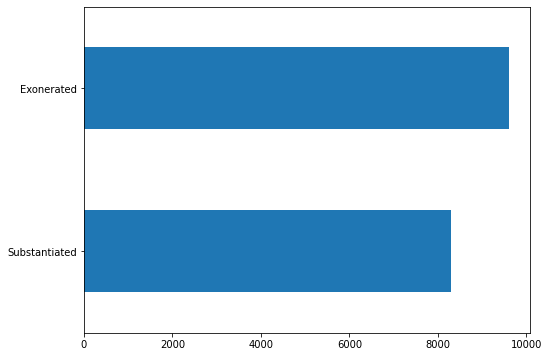

In [6]:
#plot
df['board_disposition'].value_counts().sort_values().plot(kind='barh',figsize = (8,6))

Graph of the complainant ethnicities. Show us the breakdown of the demographics of complainants.

<AxesSubplot:>

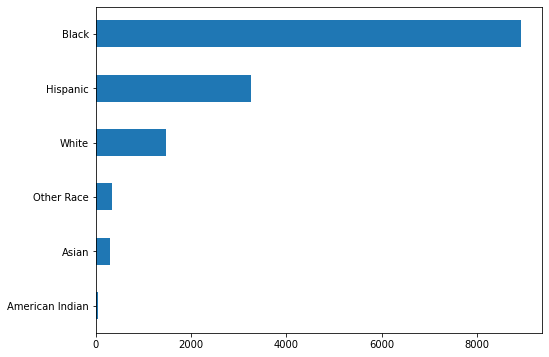

In [7]:
#plot
df['complainant_ethnicity'].value_counts().sort_values().plot(kind='barh', figsize = (8,6))

Graph of the officer ethnicities. Show us the breakdown of the demographics of officers.

<AxesSubplot:>

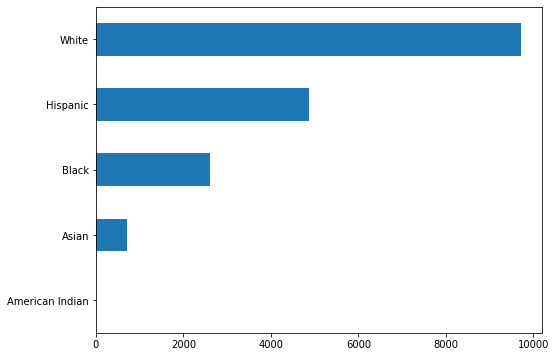

In [8]:
#plot
df['mos_ethnicity'].value_counts().sort_values().plot(kind='barh', figsize = (8,6))

From the two ethnicity graphs, we can see that there is a disparity in the dominant races for officers and complainants

#### Bivariate Analysis

We want a DataFrame of only white officers because we want to answer the question "Are white officer vs. non-white complainant cases more likely to go against the complainant?". We will see if plots of white officers and case dispositions have any relation.

In [9]:
#Get DataFrame where its white officers only
white_mos = df.copy()
white_mos = white_mos[['mos_ethnicity','complainant_ethnicity','board_disposition']]
white_mos = white_mos[white_mos['mos_ethnicity'] == 'White']
white_mos.head()

,mos_ethnicity,complainant_ethnicity,board_disposition
1,White,Black,Substantiated
2,White,Black,Substantiated
3,White,Black,Substantiated
6,White,White,Substantiated
10,White,NaN,Substantiated


Created a pivot table to better understand the DataFrame. The table breaks down the ethnicities and their proportion getting exonerated or substantiated. The complainants want the outcome of substantiated.

In [10]:
#pivot table is white officers and proportion of ethnicity
disp_cnts = white_mos.pivot_table(index='complainant_ethnicity', columns='board_disposition', aggfunc='size')
disp_distr = disp_cnts / disp_cnts.sum()
disp_distr

board_disposition,Exonerated,Substantiated
complainant_ethnicity,,
American Indian,0.002900,0.005688
Asian,0.018850,0.025597
Black,0.636781,0.597838
Hispanic,0.215805,0.224972
Other Race,0.023683,0.022184
White,0.101982,0.123720


Exonerated is not in the complainant's favor. From this graph we can already see that 'Black' and 'Other Race' are exonerated more than substantiated.

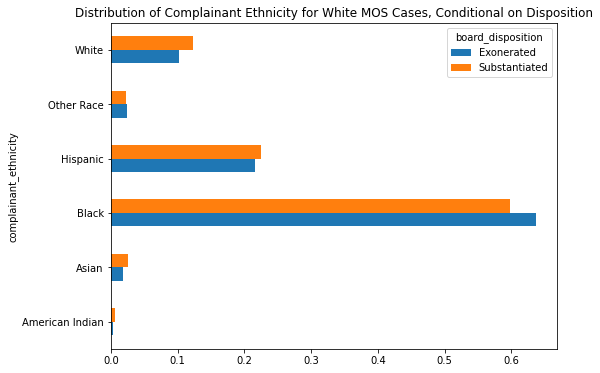

In [11]:
#plot
disp_distr.plot(kind='barh', title='Distribution of Complainant Ethnicity for White MOS Cases, Conditional on Disposition',figsize = (8,6));

This is a plot of the cop's ethnicities and their disposition. Exonerated here is in favor of the cops. We can see that White cops are the only ethnicity that has more exonerated than substantiated

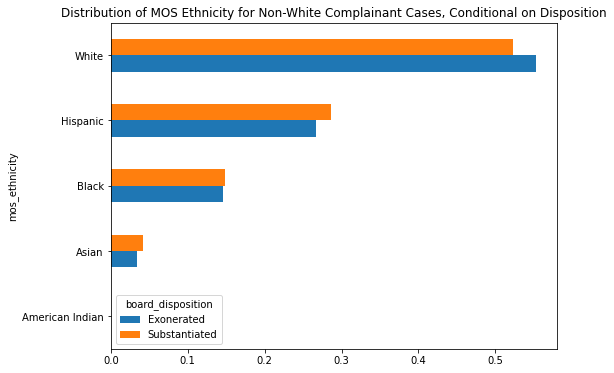

In [12]:
#All cops but only nonwhite complainant

#Create a DataFrame with all cops but only nonwhite complainant
all_mos_nwc = df.copy()
all_mos_nwc = all_mos_nwc[['mos_ethnicity','complainant_ethnicity','board_disposition']]
all_mos_nwc = all_mos_nwc[all_mos_nwc['complainant_ethnicity'] != 'White']

#Create a pivot table (similar to the previous one)
mos_disp_cnts = all_mos_nwc.pivot_table(index='mos_ethnicity', columns='board_disposition', aggfunc='size')
mos_disp_distr = mos_disp_cnts / mos_disp_cnts.sum()
mos_disp_distr.plot(kind='barh', title='Distribution of MOS Ethnicity for Non-White Complainant Cases, Conditional on Disposition',figsize = (8,6));

Graph of the Case Time of Whites vs. Non-White complainants. The results show that white cases are typically faster than non-white cases. This helps the analysis cause it helps prove that white people are treated differently during these cases.

0        305
1        274
2        274
3        427
4        184
        ... 
33351    305
33352    184
33355    184
33356    184
33357    184
Name: case_time, Length: 17910, dtype: int64

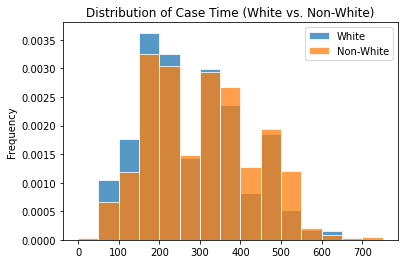

In [14]:
#time of white case vs. nonwhite cases

#Create a DataFrame with necessary columns only
time = df.copy()
time = time[['date_received','date_closed','complainant_ethnicity']]

#Create a new column that calculates the length it took for a case to finish
time['case_time'] = time['date_closed'] - time['date_received']
time = time.drop(columns = {'date_received','date_closed'})
time = time.replace(dict.fromkeys(['Black', 'Hispanic', 'Other Race', 'Asian', 'American Indian'], 'Non-White'))
time['case_time'] = time.apply(lambda row: row.case_time.days, axis=1)

#Plot
G = time.groupby('complainant_ethnicity')
ax = G.get_group('White')['case_time'].rename('White').plot(kind='hist', density=True, alpha=0.75, 
                                                          ec='w', bins=np.arange(0, 800, 50),
                                                          legend=True, title='Distribution of Case Time (White vs. Non-White)')
G.get_group('Non-White')['case_time'].rename('Non-White').plot(kind='hist', density=True, alpha=0.75, 
                                                       ec='w', bins=np.arange(0, 800, 50),
                                                       ax=ax, legend=True);

#### Interesting Aggregates

The mean case time for non-white and white complainants. Non-whites have longer case-times by 30 days

In [28]:
#mean in days
G.mean()

,case_time
complainant_ethnicity,
Non-White,308.188165
White,279.613297


Pivot table of complainant's ethnicities in terms of Non-White and White. The table has the proportions that are exonerated and substantiated. This table only includes the data of white officers. The proprotions demonstrate that White complainants have favorable results.

In [31]:
#white officers only, all complainants

#Create a pivot table with board_dispostion as index and complainant_ethnicity as the columns. 
pt = white_mos.copy()

#Replace ethnicities with Non-White for easier comparison
pt = pt.replace(dict.fromkeys(['Black', 'Hispanic', 'Other Race', 'Asian', 'American Indian'], 'Non-White'))
pt_disp_cnts = pt.pivot_table(index='board_disposition', columns='complainant_ethnicity', aggfunc='size')

#Divide by .sum() because of different numbers of White and Non-White people.
table = pt_disp_cnts / pt_disp_cnts.sum()
table

complainant_ethnicity,Non-White,White
board_disposition,,
Exonerated,0.546712,0.492415
Substantiated,0.453288,0.507585


Pivot table of officer's ethnicities in terms of Non-White and White. The table has the proportions that are exonerated and substantiated. This table includes the data all officers. The proprotions demonstrate that White officers have favorable results.

In [30]:
#all officers, non-white complainants
pt2 = all_mos_nwc.copy()

#Replace ethnicities with Non-White for easier comparison
pt2 = pt2.replace(dict.fromkeys(['Black', 'Hispanic', 'Other Race', 'Asian', 'American Indian'], 'Non-White'))

#Create a pivot table with board_dispostion as index and officer ethnicity as the columns.
pt2_disp_cnts = pt2.pivot_table(index='board_disposition', columns='mos_ethnicity', aggfunc='size')

#Divide by .sum() because of different numbers of White and Non-White people.
pt2_disp_cnts / pt2_disp_cnts.sum()

mos_ethnicity,Non-White,White
board_disposition,,
Exonerated,0.526142,0.555969
Substantiated,0.473858,0.444031


These pivot tables will be helpful for creating the hypothesis test.

### Assessment of Missingness

**Not missing at random**. Complainant gender may be not missing at random because of social stigma against gender (e.g. transphobia, sexism). The complainant may not want to report their gender because of this.

In [36]:
# The amount of missing values in the gender column
gender = df.copy()

gender['complainant_gender'].isna().sum()

2687

**Missing at Random**. Does the missingness of the complainant ethnicity depend on the mos being white or nonwhite?

In [37]:
#Create DataFrame copy
mar = df.copy()
mar = mar[['complainant_ethnicity','mos_ethnicity']]

#Create column of boolean values that state whether the complainant ethnicity is missing or not
mar['ce_isnull'] = mar['complainant_ethnicity'].isna()

#Replace non-white ethnicities 'Non-White'
mar['mos_ethnicity'] = mar['mos_ethnicity'].replace(dict.
                    fromkeys(['Black', 'Hispanic', 'Other Race', 'Asian', 'American Indian'], 'Non-White'))
mar.head()

,complainant_ethnicity,mos_ethnicity,ce_isnull
0,Black,Non-White,False
1,Black,White,False
2,Black,White,False
3,Black,White,False
4,NaN,Non-White,True


The missingness of the complainant's ethnicity plotted against white/non-white officers. We can see that there is more missing data when the officer is white.

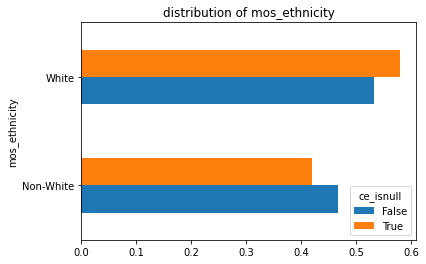

In [44]:
#Create pivot table of the missingness.
emp_distributions = (
    mar
    .pivot_table(columns='ce_isnull', index='mos_ethnicity', aggfunc='size')
    .apply(lambda x:x / x.sum())
)

#plot
emp_distributions.plot(kind='barh', title='distribution of mos_ethnicity');

We will use the test statistic TVD to see if this is MAR

In [45]:
#Calculate TVD
observed_tvd = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
observed_tvd

0.04687653847877549

Perform a permutation test on the data to see if the complainant's ethnicity is MAR dependent on the cop's ethnicity

In [46]:
n_repetitions = 500

mar_mos = mar.copy()[['mos_ethnicity', 'ce_isnull']]
tvds = []
for _ in range(n_repetitions):
    
    #Shuffle the officer's ethnicities
    shuffled_ethnicity = (
        mar_mos['mos_ethnicity']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    #Assign the shuffled data
    shuffled = (
        mar_mos
        .assign(**{'Shuffled Ethnicity': shuffled_ethnicity})
    )
    
    #Create a pivot table to calculate empirical distributions like the pivot table earlier.
    shuffed_emp_distributions = (
        shuffled
        .pivot_table(columns='ce_isnull', index='Shuffled Ethnicity', values=None, aggfunc='size')
        .apply(lambda x:x/x.sum())
    )
    
    #Calculate TVD
    tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    
    tvds.append(tvd)

Plot of the permutations

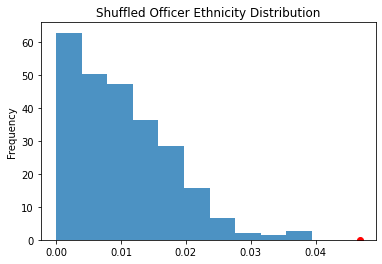

In [51]:
#plot
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd, 0, color='red')
plt.title(label = 'Shuffled Officer Ethnicity Distribution');

The p-Value is 0.0. This shows that the complainant's ethnicity is MAR dependent on the officer's ethnicity.

In [52]:
#P-Value
np.count_nonzero(tvds >= observed_tvd) / len(tvds)

0.0

**Missing at Random**. Does the missingness of the complainant ethnicity depend on the starting month of the case?

In [53]:
#Create DataFrame copy
mar_nd = df.copy()

#Get useful cols
mar_nd = mar_nd[['complainant_ethnicity','date_received']]

#Convert pd.TimeStamp to string (month name)
mar_nd['date_received'] = mar_nd['date_received'].dt.month_name()

#Boolean values for missing
mar_nd['ce_isnull'] = mar_nd['complainant_ethnicity'].isna()

mar_nd.head()

,complainant_ethnicity,date_received,ce_isnull
0,Black,July,False
1,Black,November,False
2,Black,November,False
3,Black,July,False
4,NaN,August,True


Plot the empirical distribution of the missingness of complainant ethnicity and month received

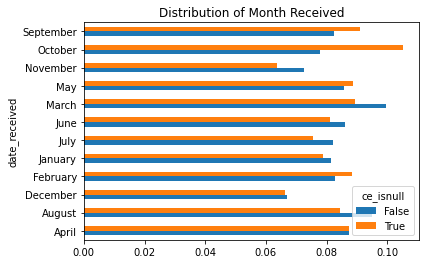

In [54]:
mon_emp_distributions = (
    mar_nd
    .pivot_table(columns='ce_isnull', index='date_received', aggfunc='size')
    .apply(lambda x:x / x.sum())
)

mon_emp_distributions.plot(kind='barh', title='Distribution of Month Received');

Calculate the observed TVD.

In [55]:
#calculate tvd
mon_observed_tvd = np.sum(np.abs(mon_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
mon_observed_tvd

0.044456303644298346

Perform permutation for months and complainant's ethnicity

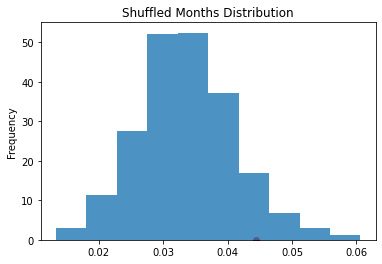

In [59]:
n_repetitions = 500

mon_mar_nd = mar_nd.copy()[['date_received', 'ce_isnull']]
mon_tvds = []
for _ in range(n_repetitions):
    
    #Shuffle the months
    shuffled_months = (
        mon_mar_nd['date_received']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    #Assign shuffled
    shuffled = (
        mon_mar_nd
        .assign(**{'Shuffled Months': shuffled_months})
    )
    
    #Create pivot table to calculate proportions
    shuffed_emp_distributions = (
        shuffled
        .pivot_table(columns='ce_isnull', index='Shuffled Months', values=None, aggfunc='size')
        .apply(lambda x:x/x.sum())
    )
    
    tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    
    mon_tvds.append(tvd)
pd.Series(mon_tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(mon_observed_tvd, 0, color='red')
plt.title(label = 'Shuffled Months Distribution');

The p-value is 0.076. This means that the complainant's ethnicity is not MAR dependent on the month the case is received. We can reject with a significance level of 5%

In [60]:
np.count_nonzero(mon_tvds >= mon_observed_tvd) / len(mon_tvds)

0.076

### Hypothesis Testing

**Null hypothesis**: In the NYPD, the distribution of white cops vs. non-white complainant's board disposition is the same as the distribution of all cops vs. non-white complainants.

**Alternative hypothesis**: In the NYPD, the distribution of white cops vs. non-white complainant's board disposition is a different distribution from all cops vs. non-white complainants.

**Test Statistic**: Total Variation Distance

**Significance Level**: 5%

The table we will be using for the hypothesis test

In [75]:
#White officers only.
table

complainant_ethnicity,Non-White,White
board_disposition,,
Exonerated,0.546712,0.492415
Substantiated,0.453288,0.507585


Function that calculates the tvd from a DataFrame. We are calculating the TVD of the table above. This is helpful for repeated experiments.

In [76]:
def tvd_of_groups(df):
    #Create a pivot table. See above to see similar table
    cnts = df.pivot_table(index='board_disposition', columns='complainant_ethnicity', aggfunc='size')
    
    #Normalize the values
    distr = cnts / cnts.sum() 
    
    #Return TVD
    return distr.diff(axis=1).iloc[:, -1].abs().sum() / 2 

Calculate observed TVD for the table. See above for the table. 

In [77]:
obs = table.diff(axis=1).iloc[:, -1].abs().sum() / 2
obs

0.05429638204376319

Permutation test.

In [97]:
N = 1000
hyp_tvds = []

for _ in range(N):
    
    #shuffle the board disposition
    s = pt['board_disposition'].sample(frac=1).reset_index(drop=True)
    
    shuffled = pt.loc[:, ['complainant_ethnicity']].assign(board_disposition=s)
    
    hyp_tvds.append(tvd_of_groups(shuffled))

hyp_tvds = pd.Series(hyp_tvds)

Plot the permutation test. The p-Value is 0.087

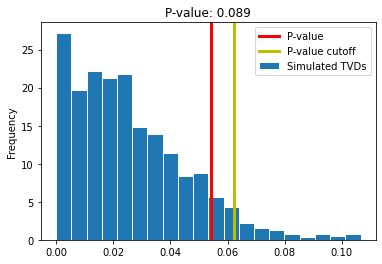

In [99]:
#calculate p-value
pval = (hyp_tvds >= obs).sum() / N
hyp_tvds.plot(kind='hist', density=True, ec='w', bins=20, title=f'P-value: {pval}', label='Simulated TVDs')
plt.axvline(x=obs, color='red', linewidth=3, label='P-value')

# 5% significance level. Create p-value cutoff line
perc = np.percentile(hyp_tvds, 95)
plt.axvline(x=perc, color='y', linewidth=3, label='P-value cutoff')

plt.legend();